In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [ ]:
url = '/content/drive/MyDrive/CSE4238/Offline 2/'

In [ ]:
dataset_2 = url + 'Dataset_2.zip'
with ZipFile(dataset_2, 'r') as zip:
  zip.extractall()

In [ ]:
PATH = '/content/'

In [ ]:
data_train = pd.read_csv(PATH + 'Dataset_2/verification_train.csv')
data_test = pd.read_csv(PATH + 'Dataset_2/verification_test.csv')

In [ ]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_data = data_train.drop("label", axis=1).values.astype(np.uint8)
y_data = data_train["label"].values

X_test = data_test.drop("label", axis=1).values.astype(np.uint8)
y_test = data_test["label"].values

In [ ]:
class DigitsDataset(Dataset):
    def __init__(self, X, y=None, transforms=None):
        self.X = X
        self.y = y
        self.transforms = transforms

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        X = np.reshape(self.X[idx], (28, 28, 1))
        if self.transforms is not None:
            X = self.transforms(X)
        if self.y is not None:
            return X, self.y[idx]
        else:
            return X

In [ ]:
transform_train = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

In [ ]:
train_data = DigitsDataset(X=X_data, y=y_data, transforms=transform_train)
test_data = DigitsDataset(X=X_test, y=y_test, transforms=transform_test)

# **Base Parameters**

In [ ]:
batch_size = 20
num_iters = 20000
input_dim = 28*28
num_hidden = 200
output_dim = 10

learning_rate = 0.01

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

6


In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=False)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:3000
Test dataloader:500


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas

In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 500. Loss: 2.2981085777282715. Accuracy: 19.16
Iteration: 1000. Loss: 2.2891979217529297. Accuracy: 27.55
Iteration: 1500. Loss: 2.240612745285034. Accuracy: 29.36
Iteration: 2000. Loss: 1.5300335884094238. Accuracy: 41.04
Iteration: 2500. Loss: 1.263236403465271. Accuracy: 57.27
Iteration: 3000. Loss: 0.6598073244094849. Accuracy: 68.22
Epoch:  2
Iteration: 3500. Loss: 1.113274097442627. Accuracy: 73.26
Iteration: 4000. Loss: 1.1374328136444092. Accuracy: 75.55
Iteration: 4500. Loss: 0.5670573115348816. Accuracy: 77.02
Iteration: 5000. Loss: 0.7895632982254028. Accuracy: 76.61
Iteration: 5500. Loss: 0.9959718585014343. Accuracy: 76.1
Iteration: 6000. Loss: 0.6154919266700745. Accuracy: 79.02
Epoch:  3
Iteration: 6500. Loss: 0.918861985206604. Accuracy: 81.37
Iteration: 7000. Loss: 0.9155292510986328. Accuracy: 81.51
Iteration: 7500. Loss: 0.29616591334342957. Accuracy: 82.07
Iteration: 8000. Loss: 0.670947253704071. Accuracy: 80.57
Iteration: 8500. Loss: 0.7583745

[2.2981085777282715, 2.2891979217529297, 2.240612745285034, 1.5300335884094238, 1.263236403465271, 0.6598073244094849, 1.113274097442627, 1.1374328136444092, 0.5670573115348816, 0.7895632982254028, 0.9959718585014343, 0.6154919266700745, 0.918861985206604, 0.9155292510986328, 0.29616591334342957, 0.670947253704071, 0.7583745121955872, 0.3264581561088562, 0.7624927759170532, 0.7283614873886108, 0.209847092628479, 0.632637619972229, 0.6429407596588135, 0.2423202097415924, 0.7027155160903931, 0.6293066740036011, 0.20249342918395996, 0.6201306581497192, 0.572650134563446, 0.21085453033447266, 0.6383295655250549, 0.48791271448135376, 0.187007874250412, 0.5801572799682617, 0.5327494740486145, 0.17536774277687073]


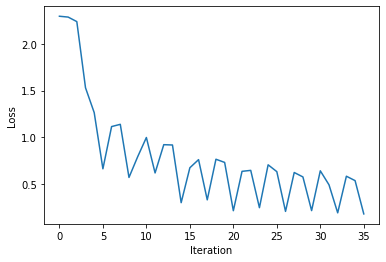

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# **Best Parameters**

In [ ]:
batch_size = 250
num_iters = 24000
input_dim = 28*28
num_hidden = 220
output_dim = 10

learning_rate = 0.001

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

100


In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=False)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:240
Test dataloader:40


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas

In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=220, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=220, out_features=220, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=220, out_features=220, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=220, out_features=220, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=220, out_features=220, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=220, out_features=220, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=220, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Epoch:  2
Epoch:  3
Iteration: 500. Loss: 0.369142085313797. Accuracy: 85.62
Epoch:  4
Epoch:  5
Iteration: 1000. Loss: 0.4129369556903839. Accuracy: 86.17
Epoch:  6
Epoch:  7
Iteration: 1500. Loss: 0.3944464921951294. Accuracy: 87.78
Epoch:  8
Epoch:  9
Iteration: 2000. Loss: 0.32596728205680847. Accuracy: 88.0
Epoch:  10
Epoch:  11
Iteration: 2500. Loss: 0.31617069244384766. Accuracy: 89.07
Epoch:  12
Epoch:  13
Iteration: 3000. Loss: 0.20073944330215454. Accuracy: 88.39
Epoch:  14
Epoch:  15
Iteration: 3500. Loss: 0.18611472845077515. Accuracy: 87.86
Epoch:  16
Epoch:  17
Iteration: 4000. Loss: 0.2484348714351654. Accuracy: 87.57
Epoch:  18
Epoch:  19
Iteration: 4500. Loss: 0.22317907214164734. Accuracy: 88.51
Epoch:  20
Epoch:  21
Iteration: 5000. Loss: 0.2496313601732254. Accuracy: 88.83
Epoch:  22
Epoch:  23
Iteration: 5500. Loss: 0.12242797762155533. Accuracy: 88.94
Epoch:  24
Epoch:  25
Iteration: 6000. Loss: 0.15864284336566925. Accuracy: 88.21
Epoch:  26
Epoch:  27


[0.369142085313797, 0.4129369556903839, 0.3944464921951294, 0.32596728205680847, 0.31617069244384766, 0.20073944330215454, 0.18611472845077515, 0.2484348714351654, 0.22317907214164734, 0.2496313601732254, 0.12242797762155533, 0.15864284336566925, 0.11752492934465408, 0.18082699179649353, 0.1573343127965927, 0.12920241057872772, 0.17529362440109253, 0.12038414925336838, 0.15408505499362946, 0.11997169256210327, 0.12544678151607513, 0.08104576915502548, 0.07452962547540665, 0.04451634734869003, 0.03684172034263611, 0.05810633674263954, 0.07348155230283737, 0.04067027196288109, 0.05451476573944092, 0.02845858782529831, 0.03385978564620018, 0.03707151114940643, 0.028700465336441994, 0.046528615057468414, 0.0409461073577404, 0.019340084865689278, 0.041318412870168686, 0.008042421191930771, 0.02778766304254532, 0.05659407004714012, 0.05141117423772812, 0.03922325000166893, 0.03649575635790825, 0.03424348309636116, 0.01942840963602066, 0.038327258080244064, 0.018611812964081764, 0.01534079574

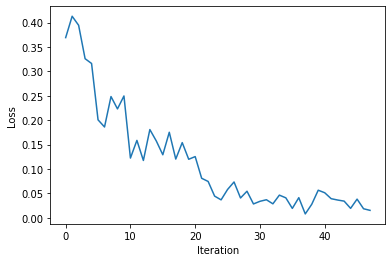

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# **SUMMARY**

In [4]:
from tabulate import tabulate

In [5]:
summary = {'Activation\nFunction':['ReLU', 'ReLU'],
           'Optimizer':['SGD', 'ADAM'],
           'Loss\nFunction':['Cross\nEntropy', 'Cross\nEntropy'],
           'Batch\nSize':[20, 250],
           'Input':['28x28', '28x28'],
           'Output':[10, 10],
           'Hidden\nLayers':[6, 6],
           'Hidden\nNodes':[200, 220],
           'Epochs':[6, 100],
           'Iterations':[18000, 24000],
           'LR':[0.01, 0.001],
           'Loss':[0.18, 0.02],
           'Accuracy':[86.34, 89.2]}

table = pd.DataFrame(summary, index =['Base',
                                   'Test 04'])

In [6]:
print('COMPARISON TABLE:')
print(tabulate(table, headers = 'keys', tablefmt = 'fancy_grid'))

COMPARISON TABLE:
╒═════════╤══════════════╤═════════════╤════════════╤═════════╤═════════╤══════════╤══════════╤══════════╤══════════╤══════════════╤═══════╤════════╤════════════╕
│         │ Activation   │ Optimizer   │ Loss       │   Batch │ Input   │   Output │   Hidden │   Hidden │   Epochs │   Iterations │    LR │   Loss │   Accuracy │
│         │ Function     │             │ Function   │    Size │         │          │   Layers │    Nodes │          │              │       │        │            │
╞═════════╪══════════════╪═════════════╪════════════╪═════════╪═════════╪══════════╪══════════╪══════════╪══════════╪══════════════╪═══════╪════════╪════════════╡
│ Base    │ ReLU         │ SGD         │ Cross      │      20 │ 28x28   │       10 │        6 │      200 │        6 │        18000 │ 0.01  │   0.18 │      86.34 │
│         │              │             │ Entropy    │         │         │          │          │          │          │              │       │        │            │
├───

# **DATASET 01 & DATASET 02 COMPARISON**

In [7]:
summary = {'Loss':[2.03, 0.18, 0.38, 0.02],
           'Accuracy':[11.65, 86.34, 86.17, 89.2]}

table = pd.DataFrame(summary, index =['DATASET 1: Base',
                                      'DATASET 2: Base',
                                      'DATASET 1: Test 04',
                                      'DATASET 2: Test 04'])

In [8]:
print('COMPARISON TABLE:')
print(tabulate(table, headers = 'keys', tablefmt = 'fancy_grid'))

COMPARISON TABLE:
╒════════════════════╤════════╤════════════╕
│                    │   Loss │   Accuracy │
╞════════════════════╪════════╪════════════╡
│ DATASET 1: Base    │   2.03 │      11.65 │
├────────────────────┼────────┼────────────┤
│ DATASET 2: Base    │   0.18 │      86.34 │
├────────────────────┼────────┼────────────┤
│ DATASET 1: Test 04 │   0.38 │      86.17 │
├────────────────────┼────────┼────────────┤
│ DATASET 2: Test 04 │   0.02 │      89.2  │
╘════════════════════╧════════╧════════════╛
